In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Sparse Principal Component Analysis (Sparse PCA)

Sparse PCA introduces sparsity into the classical PCA model by applying regularization techniques such as the Lasso or Elastic Net. Sparse PCA aims to identify the most relevant principal components while forcing some coefficients to zero, thus achieving both dimensionality reduction and feature selection.

### Problem Formulation

Consider a regression problem where we observe:
- \( y \in \mathbb{R}^n \) is the response vector.
- \( X \in \mathbb{R}^{n \times p} \) is the data matrix.
- \( \beta \in \mathbb{R}^p \) is the coefficient vector to be estimated.

The least squares estimation is given by:
$$
\hat{\beta} = \arg \min_{\beta} \|y - X\beta\|_2^2
$$
where \( \|\cdot\|_2^2 \) represents the squared Euclidean norm.

### Lasso for Sparse PCA

Lasso regularization modifies the objective function by introducing an \( \ell_1 \)-norm penalty on \( \beta \), which forces some elements of \( \beta \) to zero:
$$
\hat{\beta}_{\text{Lasso}} = \arg \min_{\beta} \left( \|y - X\beta\|_2^2 + \lambda \|\beta\|_1 \right)
$$
where \( \|\beta\|_1 = \sum_{i=1}^{p} |\beta_i| \) is the \( \ell_1 \)-norm, and \( \lambda \geq 0 \) is a regularization parameter controlling the degree of sparsity.

### Elastic Net

The Elastic Net generalizes Lasso by combining the \( \ell_1 \)-norm with the \( \ell_2 \)-norm (ridge regression penalty). The objective becomes:
$$
\hat{\beta}_{\text{EN}} = \arg \min_{\beta} \left( \|y - X\beta\|_2^2 + \lambda_1 \|\beta\|_1 + \lambda_2 \|\beta\|_2^2 \right)
$$
The Elastic Net retains the advantages of Lasso while addressing its limitations, such as selecting only one variable from highly correlated groups. When \( \lambda_2 = 0 \), the Elastic Net reduces to Lasso.

### Theorem

The Elastic Net is particularly useful when the predictors \( X \) have high pairwise correlations. It ensures that multiple correlated predictors are selected together, unlike Lasso, which tends to pick only one.

Let the SVD of \( X \) be given by:
$$
X = U D V^T
$$
where \( U \in \mathbb{R}^{n \times K} \), \( D \in \mathbb{R}^{K \times K} \), and \( V \in \mathbb{R}^{p \times K} \) are the singular vectors and singular values, respectively. The elastic net addresses the limitations of Lasso by combining ridge regression with Lasso, providing more stable solutions in high-dimensional settings.


## Ridge Regression and Sparse Principal Component Analysis (SPCA)

### Ridge Regression
The ridge regression estimate of $ \beta $ is given by:

$$
\hat{\beta}_{\text{ridge}} = \arg \min_{\beta} \left( \|z_i - X\beta\|_2^2 + \lambda \|\beta\|_2^2 \right)
\tag{6.8.33}
$$

Letting:

$$
\hat{v} = \frac{\hat{\beta}_{\text{ridge}}}{\|\hat{\beta}_{\text{ridge}}\|_2}
$$

then $ \hat{v} = v_i $.

This theorem establishes a connection between PCA and regression.

### Theorem 
Let $ A \in \mathbb{R}^{p \times k} = [\alpha_1, \dots, \alpha_k] $ and $ B \in \mathbb{R}^{p \times k} = [\beta_1, \dots, \beta_k] $. For any $ \lambda > 0 $, consider the constrained optimization problem:

$$
(\hat{A}, \hat{B}) = \arg \min_{A,B} \left( \|X - X B A^T \|_F^2 + \lambda \sum_{j=1}^{k} \|\beta_j\|_2^2 \right)
\tag{6.8.34}
$$

subject to $ A^T A = I_{k \times k} $. Then, $ \hat{\beta_j} \propto v_j \) for \( j = 1, \dots, k $.

### Lasso Penalty with PCA
When adding the Lasso penalty, the criterion (6.8.34) becomes:

$$
(\hat{A}, \hat{B}) = \arg \min_{A,B} \left( \|X - X B A^T \|_F^2 + \sum_{j=1}^{k} \left( \lambda \|\beta_j\|_2^2 + \lambda_{1,j} \|\beta_j\|_1 \right) \right)
\tag{6.8.35}
$$

subject to $ A^T A = I_{k \times k} $.

Given that $ \|X - X B A^T \|_F^2 = (A - B)^T X^T X (A - B) $, substitute this into (6.8.35):

$$
(\hat{\alpha}_j, \hat{\beta}_j) = \arg \min_{\alpha_j, \beta_j} \left( (\alpha_j - \beta_j)^T X^T X (\alpha_j - \beta_j) + \lambda \|\beta_j\|_2^2 + \lambda_{1,j} \|\beta_j\|_1 \right)
\tag{6.8.36}
$$

This coupled optimization problem can be solved using alternating methods.

### SPCA Algorithm (Algorithm )

1. **Input**: Data matrix $ X \in \mathbb{R}^{n \times p} $ and response vector $ y \in \mathbb{R}^n $.
2. **Initialization**:
   - Perform truncated SVD $ X = \sum_{i=1}^{k} d_i u_i v_i^T $.
   - Set $ \alpha_j = v_j $, for $ j = 1, \dots, k $.
   - Choose $ \lambda > 0 $ and $ \lambda_{1,i} > 0 $, for $ i = 1, \dots, k $.
3. **Elastic Net Step**: For fixed $ A = [\alpha_1, \dots, \alpha_k] $, solve the elastic net problem for $ j = 1, \dots, k $:
   $$ 
   \beta_j = \arg \min_{\beta} \left( (\alpha_j - \beta)^T X^T X (\alpha_j - \beta) + \lambda \|\beta\|_2^2 + \lambda_{1,j} \|\beta\|_1 \right)
   $$
4. **SVD Update**: For fixed $ B = [\beta_1, \dots, \beta_k] $, compute the SVD of $ X^T X B = U D V^T $, and update $ A = U V^T $.
5. **Repeat** Steps 3 and 4 until convergence.
6. **Normalization**: Normalize $ \beta_j $ by $ \|\beta_j\|_2 $ for $ j = 1, \dots, k $.
7. **Output**: Normalized fitting coefficient vectors $ \beta_j $, for $ j = 1, \dots, k $.


## Steps

### Ridge Regression: 

Solves the regularized least squares problem using the closed-form solution for Ridge Regression.

### Lasso: 

A coordinate descent algorithm is used to compute Lasso estimates.
### SPCA: 

Alternates between solving the elastic net problem (using Lasso) and updating the principal components using SVD.

Ridge Regression Coefficients:
[ 1.39715999  0.92122561  0.05355157 -0.64262424  0.70238682  0.38310737
  0.88898589  0.65722895  1.07043162 -0.53325769]

Sparse PCA Components (A):
[[-0.05627781 -0.01364476  0.12016603 -0.10006976 -0.08686227]
 [ 0.87494177 -0.00249197 -0.08931546 -0.0124053  -0.06760449]
 [ 0.05499336  0.16321906 -0.04270027  0.10346876 -0.89621602]
 [-0.26957606  0.02205827 -0.38701081 -0.09048174 -0.34350387]
 [ 0.08941085  0.89372803  0.12514374 -0.23726809  0.09723633]
 [-0.11603111 -0.06986996  0.87570458 -0.00602284 -0.19868906]
 [-0.19306563 -0.09434276 -0.13532594 -0.033697   -0.03533226]
 [ 0.01416512  0.06010807  0.05062525  0.04201847  0.05665107]
 [-0.1853151   0.05957814 -0.10100485 -0.74421614 -0.0019518 ]
 [-0.24967978  0.39113411 -0.11128664  0.59820423  0.11529417]]

Sparse PCA Coefficients (B):
[[-0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [ 7.86174853e-03 -8.94465194e-05  0.00000000e+00 -8.57964286e-05
   0.0

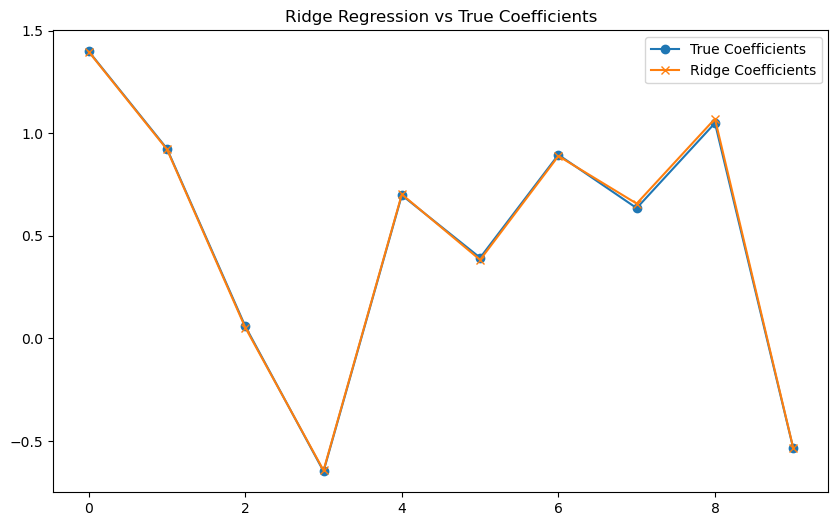

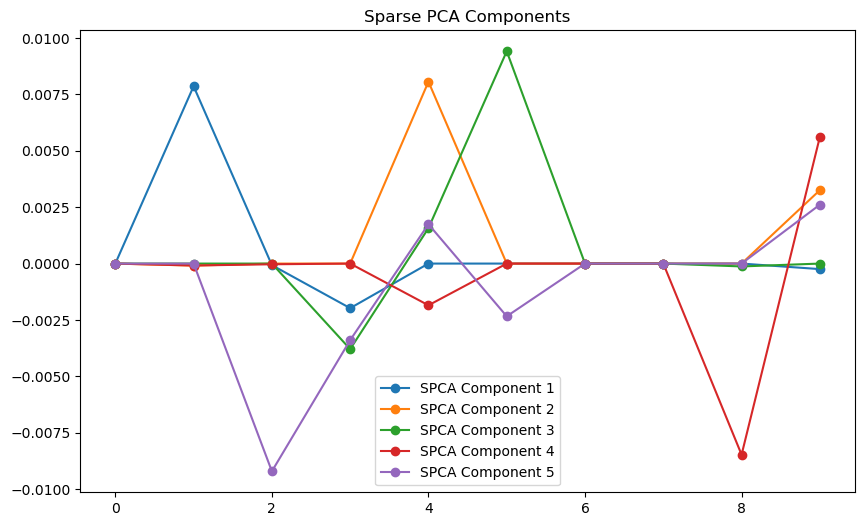

In [1]:
import numpy as np

# Ridge regression function
def ridge_regression(X, y, lambd):
    # Solve the ridge regression problem
    # (X^T X + lambda * I) * beta = X^T y
    n, p = X.shape
    I = np.eye(p)
    beta_ridge = np.linalg.inv(X.T @ X + lambd * I) @ (X.T @ y)
    return beta_ridge

# Soft-thresholding operator for Lasso
def soft_thresholding(x, lambd):
    return np.sign(x) * np.maximum(np.abs(x) - lambd, 0)

# Lasso function using coordinate descent
def lasso(X, y, lambd, tol=1e-6, max_iter=1000):
    n, p = X.shape
    beta = np.zeros(p)
    
    for iteration in range(max_iter):
        beta_old = beta.copy()
        
        for j in range(p):
            residual = y - X @ beta + X[:, j] * beta[j]
            rho = X[:, j].T @ residual
            beta[j] = soft_thresholding(rho, lambd) / np.sum(X[:, j] ** 2)
        
        if np.linalg.norm(beta - beta_old, ord=2) < tol:
            break
    
    return beta

# Sparse Principal Component Analysis (SPCA)
def spca(X, k, lambd1, lambd2, tol=1e-6, max_iter=1000):
    n, p = X.shape
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    A = VT[:k].T  # Initialize A using the top k right singular vectors

    for iteration in range(max_iter):
        A_old = A.copy()

        # Step 1: Solve elastic net problem for beta_j
        B = np.zeros_like(A)
        for j in range(k):
            XTX = X.T @ X
            B[:, j] = lasso(XTX, A[:, j], lambd1)  # Lasso solves elastic net when lambd2 = 0

        # Step 2: Update A using SVD
        U, S, VT = np.linalg.svd(X.T @ X @ B, full_matrices=False)
        A = U @ VT

        # Check for convergence
        if np.linalg.norm(A - A_old, ord='fro') < tol:
            break

    return A, B

# Generate synthetic data
np.random.seed(42)
n, p = 100, 10
X = np.random.randn(n, p)
beta_true = np.random.randn(p)
y = X @ beta_true + 0.1 * np.random.randn(n)

# Parameters for ridge and SPCA
lambd_ridge = 0.1
lambd1_spca = 0.1
lambd2_spca = 0.1
k_spca = 5

# Perform ridge regression
beta_ridge = ridge_regression(X, y, lambd_ridge)

# Perform SPCA
A_spca, B_spca = spca(X, k_spca, lambd1_spca, lambd2_spca)

# Output results
print("Ridge Regression Coefficients:")
print(beta_ridge)

print("\nSparse PCA Components (A):")
print(A_spca)

print("\nSparse PCA Coefficients (B):")
print(B_spca)

# Visualization
import matplotlib.pyplot as plt

# Ridge Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(beta_true, label='True Coefficients', marker='o')
plt.plot(beta_ridge, label='Ridge Coefficients', marker='x')
plt.title("Ridge Regression vs True Coefficients")
plt.legend()
plt.show()

# SPCA Plot
plt.figure(figsize=(10, 6))
for i in range(k_spca):
    plt.plot(B_spca[:, i], label=f'SPCA Component {i+1}', marker='o')
plt.title("Sparse PCA Components")
plt.legend()
plt.show()


## Supervised Learning Regression

Supervised learning in the form of regression (for continuous outputs) and classification (for discrete outputs) is an important field of statistics and machine learning.

The aim of machine learning is to establish a mapping relationship between inputs and outputs via learning the correspondence between the sample and the label. Supervised learning is based on a supervisor (data labeling expert): a type of machine learning of input (or training) data with labels.

In supervised learning, we are given a "training" set of input vectors $ \{x_n\}_{n=1}^{N} $ along with corresponding targets  $\{y_n\}_{n=1}^{N} $. The data set $ \{x_n, y_n\}_{n=1}^{N} $ is known as the labeled data set.

Let the domain of input instances be $ X $, and the domain of labels be $ Y $, and let $ P(x, y) $ be an (unknown) joint probability distribution on instances and labels $ X \times Y $. Given an independent identically distributed (i.i.d.) training data $ \{x_i\}_{i=1}^{N} $, denoted $ x_i \sim P(x) $, supervised learning trains a function $ f: X \to Y $ in some function family $ F $ in order to make $ f(x) $ predict the true label $ y $ on future data $ x $, where $ x \sim P(x) $ as well.

### Key Forms of Supervised Learning

1. **Classification**:
    - Targets are **discrete** class labels, such as $ y \in \{+1, -1\} $ in a binary classification problem.
    - The function $ f $ is known as a **classifier**, and the goal is to predict which class a new input belongs to.
  
2. **Regression**:
    - Targets are **continuous** values, meaning the output $ y $ is a real number.
    - The function $ f $ is a **regression function**, and the model predicts a continuous value for each new input.

### Training Process

The function $ f $ is trained on a dataset sampled from an unknown joint probability distribution $ P(x, y) $, where:
- $ X $ is the domain of input instances.
- $ Y $ is the domain of the labels.

Given this labeled dataset, the goal is to predict the label $ y $ for new instances $ x $, by minimizing the error between the predicted output and the true label on unseen data.

### Goals of Model Selection
- **Accurate Predictions**: Achieving high predictive accuracy on new data.
- **Interpretable Models**: Determining which predictors are meaningful for decision-making.
## Supervised Learning Regression

Supervised learning in the form of regression (for continuous outputs) and classification (for discrete outputs) is an important field of statistics and machine learning.

---

### Principle Component Regression (PCR)

A task to approximate real-valued functions from a training sample is referred to as prediction, regression, interpolation, or function approximation. In statistical modeling, **regression analysis** estimates the relationships between a dependent variable $X$ and one or more independent variables $Y$.

Regression analysis helps us understand how the typical value of the dependent variable changes when one of the independent variables is varied, while the others are held fixed. The regression function approximates the conditional expectation of the dependent variable given the independent variables.

#### Standard Linear Regression

Let the training set $X = \{ x_1, \dots, x_n \}$ with each $x_i = [x_{i1}, \dots, x_{ip}]^\top$, and denote the dependent variable vector as $y = [y_1, \dots, y_n]^\top$.

The goal of regression is to learn a function $f(X) : X \to y$ such that $f(X)$ is a good predictor of the corresponding $y$, minimizing the error $\frac{1}{2} \| y - f(X) \|_2^2$. 

The regression model can be written as:

$$
y = X \beta + \epsilon
$$

where $\beta \in \mathbb{R}^p$ is the vector of unknown parameters, and $\epsilon$ is the error term. The least squares (LS) estimate of $\beta$ is given by:

$$
\hat{\beta}_{LS} = (X^\top X)^{-1} X^\top y
$$

---

#### Principal Component Regression (PCR)

Principal Component Regression (PCR) is based on performing **Principal Component Analysis (PCA)** before applying regression. PCR reduces the dimensionality of the data by projecting it onto the principal components.

Let $R = X^\top X$ be the sample autocorrelation matrix, and its **singular value decomposition (SVD)** be:

$$
R = V \Lambda V^\top
$$

where $V$ is the matrix of principal component directions (PCA loadings), and $\Lambda$ contains the eigenvalues. Using the principal components $W = XV$, the regression equation becomes:

$$
y = W \gamma = XV \gamma
$$

By comparing with the linear regression model $y = X \beta$, we find $\beta = V \gamma$.

---

#### PCR Steps:

1. **Principal Components Extraction**:
   Perform SVD on the centered data matrix $X$ to get $X = U \Sigma V^\top$, where $V = [v_1, \dots, v_p]$ are the principal components.
   
2. **Form the Regression Equation**:
   Replace $X$ by its first $k$ principal components $W_k = XV_k$, and solve the regression equation:

   $$
   y = W_k \gamma_k
   $$

3. **PCR Estimator**:
   The estimate of $\gamma_k$ is given by:

   $$
   \hat{\gamma}_k = (W_k^\top W_k)^{-1} W_k^\top y
   $$

   The final PCR estimator of $\beta$ is:

   $$
   \hat{\beta}_k = V_k \hat{\gamma}_k
   $$

---

### PCR Algorithm

1. **Input**: Data matrix $X \in \mathbb{R}^{n \times p}$, response vector $y \in \mathbb{R}^n$.
   
2. **Initialization**: Center the columns of $X$ and vector $y$.

3. **SVD**: Perform SVD on $X = U \Sigma V^\top$.

4. **Principal Components**: Select $k$ largest principal eigenvalues and construct the transformed data matrix $W_k$.

5. **Estimate $\gamma_k$**: Compute $\hat{\gamma}_k = (W_k^\top W_k)^{-1} W_k^\top y$.

6. **Estimate $\beta_k$**: Obtain $\hat{\beta}_k = V_k \hat{\gamma}_k$.

7. **Output**: $\hat{\beta}_k$.

---

This is how the Principal Component Regression process can be understood and implemented.


In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def pcr(X, y, n_components):
    """
    Principal Component Regression (PCR) implementation.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Input data matrix (n_samples x n_features)
    y : numpy.ndarray
        Target vector (n_samples)
    n_components : int
        Number of principal components to keep
    
    Returns:
    --------
    beta_hat : numpy.ndarray
        Estimated regression coefficients
    pca : PCA object
        Fitted PCA object
    """
    
    # Standardize the input data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Step 1: Perform PCA on the standardized data
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Step 2: Perform linear regression on the principal components
    reg = LinearRegression()
    reg.fit(X_pca, y)
    
    # Step 3: Transform the coefficients back to the original space
    beta_hat = pca.components_.T @ reg.coef_
    
    return beta_hat, pca

# Example usage:
if __name__ == "__main__":
    # Sample data
    np.random.seed(42)
    X = np.random.rand(100, 5)  # 100 samples, 5 features
    y = np.random.rand(100)     # Target values
    
    # Perform PCR with 2 principal components
    beta_hat, pca = pcr(X, y, n_components=2)
    
    print("Estimated coefficients (beta):", beta_hat)


Estimated coefficients (beta): [-0.00655648 -0.00332111 -0.00019546  0.01740258  0.02143391]


# Partial Least Squares (PLS) Regression

Let $ X \subseteq \mathbb{R}^N $ be an $N$-dimensional space of variables representing the first block, and $ Y \subseteq \mathbb{R}^M $ be a space representing the second block of variables. The general setting of a linear partial least squares (PLS) algorithm is to model the relations between these two data sets (blocks of variables) by means of score vectors.

The PLS model can be considered as consisting of outer relations for the $X$- and $Y$-blocks individually) and an inner relation (linking both blocks). Let $ p $ denote the number of components in the model, and $ N $ be the number of objects.

The main symbols in the PLS model are defined as follows:

$$
X \in \mathbb{R}^{N \times K} \text{ : matrix of predictor variables,}
$$
$$
Y \in \mathbb{R}^{N \times M} \text{ : matrix of response variables,}
$$
$$
E \in \mathbb{R}^{N \times K} \text{ : residual matrix for } X,
$$
$$
F^* \in \mathbb{R}^{N \times M} \text{ : residual matrix for } Y,
$$
$$
B \in \mathbb{R}^{K \times M} \text{ : matrix of PLS regression coefficients,}
$$
$$
W \in \mathbb{R}^{K \times p} \text{ : matrix of PLS weights for } X,
$$
$$
C \in \mathbb{R}^{M \times p} \text{ : matrix of PLS weights for } Y,
$$
$$
P \in \mathbb{R}^{K \times p} \text{ : matrix of PLS loadings for } X,
$$
$$
Q \in \mathbb{R}^{M \times p} \text{ : matrix of PLS loadings for } Y,
$$
$$
T \in \mathbb{R}^{N \times p} \text{ : matrix of PLS scores for } X,
$$
$$
U \in \mathbb{R}^{N \times p} \text{ : matrix of PLS scores for } Y.
$$

The outer relations for the \( X \)- and \( Y \)-blocks are given by:

$$
X = T P^\top + E = \sum_{h=1}^{p} t_h p_h^\top + E
$$

$$
Y = U Q^\top + F^* = \sum_{h=1}^{p} u_h q_h^\top + F^*
$$

where

$$
T = [t_1, \dots, t_p] \in \mathbb{R}^{N \times p}, \quad U = [u_1, \dots, u_p] \in \mathbb{R}^{N \times p},
$$

with \( p \) score vectors (components, latent vectors) extracted from \( X \) and \( Y \), respectively. The matrices 

$$
P = [p_1, \dots, p_p] \in \mathbb{R}^{K \times p}, \quad Q = [q_1, \dots, q_p] \in \mathbb{R}^{M \times p}
$$ 

represent matrices of loadings, while \( E \in \mathbb{R}^{N \times K} \) and \( F^* \in \mathbb{R}^{N \times M} \) are the residuals.

Let

$$
t = X w \quad \text{(the X-space score vector or simply X-score)}
$$ 

and 

$$
u = Y c \quad \text{(the Y-space score vector or simply Y-score)}.
$$

The following properties of the PLS factors are essential:

1. The PLS weight vectors \( w_i \) for \( X \) are mutually orthogonal:
$$
\langle w_i, w_j \rangle = w_i^\top w_j = 0 \quad \text{for} \ i \neq j.
$$

2. The PLS score vectors \( t_i \) are mutually orthogonal:
$$
\langle t_i, t_j \rangle = t_i^\top t_j = 0 \quad \text{for} \ i \neq j.
$$

3. The PLS weight vectors \( w_i \) are orthogonal to the PLS loading vectors \( p_j \) for \( X \):
$$
\langle w_i, p_j \rangle = w_i^\top p_j = 0 \quad \text{for} \ i < j.
$$

4. The PLS loading vectors \( p_i \) are orthogonal in the kernel space of \( X \):
$$
\langle p_i, p_j \rangle_X = p_i^\top (X^\top X)^\dagger p_j = 0 \quad \text{for} \ i \neq j.
$$

5. Both the PLS loading vectors \( p_i \) for \( X \) and the PLS loading vectors \( q_i \) for \( Y \) have unit length:
$$
\| p_i \| = \| q_i \| = 1.
$$

6. Both the PLS score vector \( t_h \) for \( X \) and the PLS score vector \( u_h \) for \( Y \) have zero means for each \( h \):
$$
\sum_{i=1}^{N} t_{hi} = 0, \quad \sum_{i=1}^{N} u_{hi} = 0.
$$

The classical form of PLS is to find weight vectors \( w \) and \( c \) such that the inner relation linking the \( X \)-block and \( Y \)-block satisfies:

$$
[\text{cov}(t, u)]^2 = [\text{cov}(X w, Y c)]^2 = \max [\text{cov}(X r, Y s)]^2
$$

subject to 

$$
\|r\| = \|s\| = 1.
$$


### Algorithm : Nonlinear Iterative Partial Least Squares (NIPALS) Algorithm 

1. **Input**: Data blocks $ X = [x_1 , \dots , x_K] $ and $ Y = [y_1, \dots, y_M] $.
2. **Initialization**: Randomly generate the $ Y $-space score vector $ u $.
3. **Repeat**:

    // $ X $-space score vector update:
    4. $ w = \frac{X^\top u}{u^\top u} $,
    5. Normalize $ w $: $ \| w \| \rightarrow 1 $,
    6. $ t = X w $.

    // $ Y $-space score vector update:
    7. $ c = \frac{Y^\top t}{t^\top t} $,
    8. Normalize $ c $: $ \| c \| \rightarrow 1 $,
    9. $ u = Y c $.

    10. Exit if both $ t $ and $ u $ converge.

11. **Return**:
12. **Output**: $ X $-space score vector $ t $ and $ Y $-space score vector $ u $.


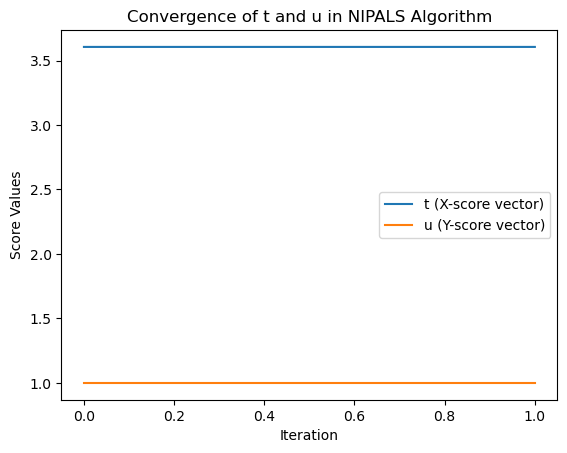

In [3]:
import math
import random
import matplotlib.pyplot as plt

# Function for matrix multiplication
def mat_mult(A, B):
    result = [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]
    return result

# Function for matrix transpose
def transpose(A):
    return list(map(list, zip(*A)))

# Function to calculate vector norm
def norm(v):
    return math.sqrt(sum([x ** 2 for x in v]))

# Function to normalize vector
def normalize(v):
    norm_v = norm(v)
    return [x / norm_v for x in v]

# Function to multiply matrix by vector
def mat_vec_mult(A, v):
    return [sum(a * b for a, b in zip(row, v)) for row in A]

# Function to multiply transpose of matrix by vector
def matT_vec_mult(A, v):
    return mat_vec_mult(transpose(A), v)

# NIPALS Algorithm
def NIPALS(X, Y, tol=1e-6, max_iter=500):
    n, k = len(X), len(X[0])
    m = len(Y[0])
    
    # Randomly initialize u (Y-space score vector)
    u = [random.choice([0.1, 1]) for _ in range(n)]
    
    t_list = []
    u_list = []
    
    for iteration in range(max_iter):
        # Update w = X^T * u / (u^T * u)
        w = matT_vec_mult(X, u)
        w = normalize(w)

        # Update t = X * w
        t = mat_vec_mult(X, w)

        # Update c = Y^T * t / (t^T * t)
        c = matT_vec_mult(Y, t)
        c = normalize(c)

        # Update u = Y * c
        u_new = mat_vec_mult(Y, c)
        
        # Collecting data for plot
        t_list.append(t[0])  # just collecting first element for plotting convergence
        u_list.append(u_new[0])

        # Check for convergence
        if norm([u_new[i] - u[i] for i in range(n)]) < tol:
            break
        u = u_new
    
    return t, u, t_list, u_list

# Example dataset
X = [[2, 3], [3, 5], [5, 8], [7, 10]]
Y = [[1], [2], [3], [4]]

# Run NIPALS Algorithm
t, u, t_list, u_list = NIPALS(X, Y)

# Plot the convergence of score vectors t and u
plt.plot(t_list, label="t (X-score vector)")
plt.plot(u_list, label="u (Y-score vector)")
plt.xlabel('Iteration')
plt.ylabel('Score Values')
plt.title('Convergence of t and u in NIPALS Algorithm')
plt.legend()
plt.show()


## Partial Least Squares (PLS) Characteristics

The outer relations for the PLS algorithm are of the form:

$$
X = T P^T + E \quad \text{and} \quad Y = U Q^T + F^*
$$

### Supervised Learning Regression

- There is an **inner relation** of the form:
  
  $$
  u_h = b_h t_h
  $$

- The **mixed relation** is:
  
  $$
  Y = T B Q^T + F^*
  $$

  where the residual $F^*$ is minimized.

- In the iterative algorithm, the blocks get each other’s scores, which results in a better inner relation.
- To obtain orthogonal X-scores (similar to PCA), it is necessary to introduce weights.

### Connections between PLS, PCA, and CCA

There are interesting connections between Partial Least Squares (PLS), Principal Component Analysis (PCA), and Canonical Correlation Analysis (CCA) as follows:

1. The **optimization criterion** of PCA can be written as:

   $$
   \max \text{var}(Xr), \quad \text{where} \quad \|r\| = 1
   $$

   where $\text{var}(t) = \frac{t^T t}{N}$ denotes the sample variance.

2. CCA finds the direction of maximal correlation by solving the optimization problem:

   $$
   \max [\text{corr}(Xr, Ys)]^2, \quad \|r\| = \|s\| = 1
   $$

   where $\text{corr}(t, u)^2 = \frac{\text{cov}(t, u)^2}{\text{var}(t)\text{var}(u)}$ denotes the sample squared correlation.

3. The **PLS optimization criterion** can be rewritten as:

   $$
   \max [\text{cov}(Xr, Ys)]^2 = \max \left[ \text{var}(Xr) \cdot [\text{corr}(Xr, Ys)]^2 \cdot \text{var}(Ys) \right], \quad \|r\| = \|s\| = 1
   $$

   This represents that PLS is a form of CCA where the criterion of maximal correlation is balanced with the requirement to explain as much variance as possible in both the $X$- and $Y$-spaces. Note that only the $X$-space variance is involved in the case of a one-dimensional $Y$-space.

### PLS Regression

The regression based on the PLS model equations can be described by combining:

$$
X = T P^T + E
$$

and 

$$
Y = U Q^T + F^*
$$

into the standard model of PLS regression. Two assumptions are made:
- The score vectors $\{ t_i \}_{i=1}^p$ are good predictors of $Y$, where $p$ denotes the number of extracted $X$-score vectors.
- A linear inner relation between the score vectors $t$ and $u$ exists, i.e.,

  $$
  u_i = \alpha_i t_i + h_i
  $$

  where $h_i$ denotes a residual vector. Therefore:

  $$
  U = T D + H
  $$

  where $D = \text{Diag}(\alpha_1, \dots, \alpha_p)$ is a $p \times p$ diagonal matrix and $H = [h_1, \dots, h_p]$ is the matrix of residuals.

By letting $W$ be a weighting matrix such that $E W = 0$ (the zero matrix), and post-multiplying:

$$
XW = T P^T W \implies T = X W (P^T W)^{-1}
$$

Substituting this into the equation for $Y$ gives:

$$
Y = X W (P^T W)^{-1} C^T + F
$$

where:

$$
C = Q D
$$

is the matrix of regression coefficients, and $F = H Q^T + F^*$ is the residual matrix.

Finally, the PLS regression model can be written as:

$$
Y = X B_{\text{PLS}} + F
$$

where the PLS regression coefficient matrix $B_{\text{PLS}}$ is given by:

$$
B_{\text{PLS}} = W (P^T W)^{-1} C^T
$$

In the NIPALS algorithm, $W = X^T U$ and $C = Y^T T$. Pre-multiplying:

$$
T^T T = I
$$

and using this property:

$$
(P^T W)^{-1} = (T^T X X^T U)^{-1}
$$

Finally, substituting into the expression for $B_{\text{PLS}}$ gives:

$$
B_{\text{PLS}} = X^T U (T^T X X^T U)^{-1} T^T Y
$$

The NIPALS regression is an iterative process, where after the extraction of one component $t_1$, the algorithm starts again using the deflated matrices $X$ and $Y$ to extract the next component $t_2$. This process is repeated until the deflated matrix $X$ becomes a null matrix.

## NIPALS Regression Algorithm

The basic steps of the NIPALS regression are as follows:
- Find the first $X$-score $t_1 = X w$ and the first $Y$-score $u_1 = \frac{Y c}{c^T c}$ from the original data blocks $X$ and $Y$.
- Use contractive mapping to construct the residual matrices:

  $$
  X = X - t p^T \quad \text{and} \quad Y = Y - b t c^T
  $$
## Algorithm : Nonlinear Iterative Partial Least Squares (NIPALS) Regression Algorithm

### Steps:

1. **Input:** Optionally transformed, scaled, and centered data, $X = X_0$ and $Y = Y_0$.
2. **Initialization:** A starting vector of $u$, usually one of the columns of $Y$. For a single $y$, take $u = y$. Set $k = 0$.
3. **Repeat:**
   1. Compute the **X-weights**:
      $$
      w = \frac{X^T u}{u^T u}
      $$
   2. Calculate the **X-scores**:
      $$
      t = X w
      $$
   3. Calculate the **Y-weights**:
      $$
      c = \frac{Y^T t}{t^T t}
      $$
   4. Update the set of **Y-scores**:
      $$
      u = \frac{Y c}{c^T c}
      $$
   5. Exit if convergence is reached:
      $$
      \frac{\| t_{\text{old}} - t_{\text{new}} \|}{\| t_{\text{new}} \|} < \epsilon
      $$
      where $\epsilon$ is a small value (e.g., $10^{-6}$ or $10^{-8}$).
4. **Return:** Continue to the next step.

### Deflation and Component Extraction:
5. **Remove (deflate)** the present component from $X$ and $Y$. Use these deflated matrices as $X$ and $Y$ for the next component. The deflation of $Y$ is optional; results are equivalent whether $Y$ is deflated or not.
6. Compute the **X-loadings**:
   $$
   p = \frac{X^T t}{t^T t}
   $$
7. Compute the **Y-loadings**:
   $$
   q = \frac{Y^T u}{u^T u}
   $$
8. **Regression (u on t):**
   $$
   b = \frac{u^T t}{t^T t}
   $$
9. **Deflate** $X$ and $Y$ matrices:
   $$
   X \leftarrow X - t p^T \quad \text{and} \quad Y \leftarrow Y - b t c^T
   $$

### Iterative Process:
10. Increment the component counter: $k \leftarrow k + 1$.
11. Set $u_k = u$ and $t_k = t$.
12. The next set of iterations starts with the new $X$ and $Y$ matrices, which are the residual matrices from the previous iteration. The iterations continue until a stopping criterion is used, or $X$ becomes the zero matrix.

### Final Output:
- The matrices of **X-scores** $T = [t_1, \dots, t_p]$ and **Y-scores** $U = [u_1, \dots, u_p]$ are obtained.
- The matrix of PLS regression coefficients:
  $$
  B_{\text{PLS}} = X^T U (T^T X X^T U)^{-1} T^T Y
  $$

### Predicting with New Data:
- Once the matrix of PLS regression coefficients $B_{\text{PLS}}$ is computed, unknown $Y$-values for new data $X_{\text{new}}$ can be predicted as:
  $$
  \hat{Y}_{\text{new}} = X_{\text{new}} B_{\text{PLS}}
  $$

### Recap of the NIPALS Process:
- Find the second **X-score** $t_2$ and **Y-score** $u_2$ from the residual matrices $X = X - t p^T$ and $Y = Y - b t c^T$.
- Construct the new residual matrices $X$ and $Y$, and find the third **X-score** $t_3$ and **Y-score** $u_3$.
- Repeat this process until the residual matrix $X$ becomes a null matrix.
- Use the equation:
  $$
  B_{\text{PLS}} = X^T U (T^T X X^T U)^{-1} T^T Y
  $$
  to compute the matrix of regression coefficients, where $U = [u_1, \dots, u_p]$ and $T = [t_1, \dots, t_p]$ consist of $p$ **X-scores** and **Y-scores**, respectively.


## Steps to be followed

1. **Update of X-weights and Y-weights**:
   The X-weights $\mathbf{w}$ and Y-weights $\mathbf{c}$ are updated iteratively until convergence is achieved. The process involves:
   - Calculating the X-scores $\mathbf{t}$ using the current weights $\mathbf{w}$.
   - Updating the Y-scores $\mathbf{u}$ using the current weights $\mathbf{c}$.

2. **Deflation of Matrices**:
   After extracting each component, the X and Y matrices are deflated to remove the influence of the extracted component. This is done as follows:
   - Deflate the X matrix: $\mathbf{X} \leftarrow \mathbf{X} - \mathbf{t} \mathbf{p}^T$
   - Deflate the Y matrix: $\mathbf{Y} \leftarrow \mathbf{Y} - \mathbf{b} \mathbf{t} \mathbf{c}^T$, where $\mathbf{b}$ is the regression coefficient for the component.

3. **Calculation of Regression Coefficients**:
   The regression coefficients $\mathbf{B}_{\text{PLS}}$ are calculated after all PLS components have been extracted using:
   $$
   \mathbf{B}_{\text{PLS}} = \mathbf{W} (\mathbf{P}^T \mathbf{W})^{-1} \mathbf{C}^T
   $$
   where $\mathbf{W}$ and $\mathbf{C}$ are the matrices of X-weights and Y-weights, respectively, and $\mathbf{P}$ and $\mathbf{Q}$ are the loading matrices.

4. **Prediction**:
   Once the regression coefficients are determined, predictions for new data $\mathbf{X}_{\text{new}}$ can be made using:
   $$
   \hat{\mathbf{Y}}_{\text{new}} = \mathbf{X}_{\text{new}} \mathbf{B}_{\text{PLS}}
   $$

### Visualization

The plot shows the relationship between the first X-score and Y-score. The scatter plot represents:
- **X-Scores (T1)**: The first principal component extracted from the X data.
- **Y-Scores (U1)**: The corresponding first principal component extracted from the Y data.

This visualization helps in understanding how the components extracted from both blocks relate to each other and how well the PLS model captures the underlying structure in the data.


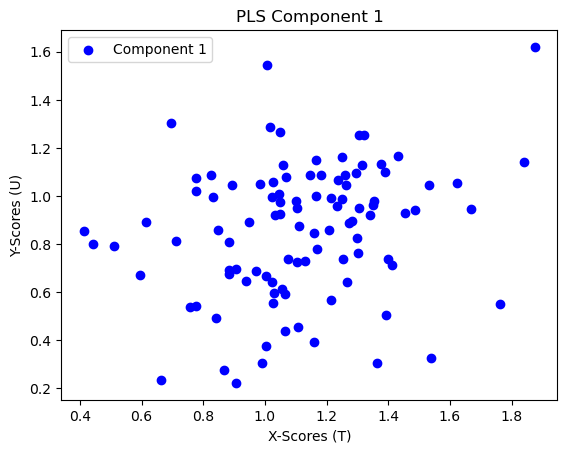

X-Scores (T):
 [[ 1.28092155  0.32861419]
 [ 1.04768734  0.34343004]
 [ 1.00516422  0.71853225]
 [ 0.77684207  0.19784194]
 [ 0.8257672  -0.22049831]
 [ 0.97013088 -0.17619746]
 [ 1.21564421 -0.61572398]
 [ 1.04748923 -0.54562145]
 [ 0.8311827  -0.26793628]
 [ 1.0046537  -0.08248394]
 [ 1.87541989  0.01935178]
 [ 0.69632747 -0.34717333]
 [ 0.94923479  0.34430433]
 [ 1.0996639   0.26626491]
 [ 1.10982997 -0.67879376]
 [ 0.93699753 -0.30725441]
 [ 0.98310741 -0.12190508]
 [ 1.37566416  0.12378215]
 [ 1.29873428  0.40917795]
 [ 0.7123812   0.15107099]
 [ 1.05604043  0.10736866]
 [ 0.77706039  0.44213363]
 [ 1.25078038  0.27784978]
 [ 1.48656796 -0.49605241]
 [ 1.06833616 -0.06341354]
 [ 1.16689113  0.54869667]
 [ 0.88415216 -0.26103509]
 [ 1.26277068  0.27674923]
 [ 1.02738805 -0.19048456]
 [ 0.66170132  0.43952731]
 [ 1.21269489 -0.54552229]
 [ 1.1667765   0.45002244]
 [ 1.02906065  0.22460579]
 [ 0.86740203 -0.28452596]
 [ 0.90635838 -0.07482684]
 [ 1.06626174  0.00930021]
 [ 1.12970712

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def nipals_pls(X, Y, num_components=2, tol=1e-6, max_iter=500):
    """
    NIPALS algorithm for Partial Least Squares Regression (PLS)
    :param X: Predictor matrix (N x K)
    :param Y: Response matrix (N x M)
    :param num_components: Number of PLS components to extract
    :param tol: Convergence tolerance
    :param max_iter: Maximum number of iterations
    :return: PLS scores, loadings, and regression coefficients
    """
    # Initialize variables
    N, K = X.shape
    M = Y.shape[1]
    
    T = np.zeros((N, num_components))  # X-scores
    U = np.zeros((N, num_components))  # Y-scores
    W = np.zeros((K, num_components))  # X-weights
    C = np.zeros((M, num_components))  # Y-weights
    P = np.zeros((K, num_components))  # X-loadings
    Q = np.zeros((M, num_components))  # Y-loadings
    B = np.zeros((K, M))               # Regression coefficients
    
    X_res = X.copy()
    Y_res = Y.copy()

    for comp in range(num_components):
        u = Y_res[:, 0].copy()  # Initialize with the first column of Y
        t = np.zeros(N)
        for iteration in range(max_iter):
            # X-weights
            w = X_res.T @ u / (u.T @ u)
            w /= np.linalg.norm(w)  # Normalize w

            # X-scores
            t_new = X_res @ w

            # Y-weights
            c = Y_res.T @ t_new / (t_new.T @ t_new)
            c /= np.linalg.norm(c)  # Normalize c

            # Y-scores
            u_new = Y_res @ c / (c.T @ c)

            # Check convergence
            if np.linalg.norm(t_new - t) / np.linalg.norm(t_new) < tol:
                t = t_new
                u = u_new
                break

            t = t_new
            u = u_new

        # X-loadings
        p = X_res.T @ t / (t.T @ t)

        # Y-loadings
        q = Y_res.T @ u / (u.T @ u)

        # Store the extracted components
        T[:, comp] = t
        U[:, comp] = u
        W[:, comp] = w
        C[:, comp] = c
        P[:, comp] = p
        Q[:, comp] = q

        # Deflate X and Y
        X_res -= t[:, np.newaxis] @ p[np.newaxis, :]
        Y_res -= u[:, np.newaxis] @ q[np.newaxis, :]

    # Regression coefficients
    B_pls = W @ np.linalg.inv(P.T @ W) @ Q.T
    return T, U, W, P, Q, B_pls


# Example: Simulated data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
Y = np.random.rand(100, 3)  # 100 samples, 3 response variables

# Apply NIPALS-PLS
T, U, W, P, Q, B_pls = nipals_pls(X, Y, num_components=2)

# Prediction on new data
X_new = np.random.rand(10, 5)  # New data with 5 features
Y_pred = X_new @ B_pls

# Plot the first X-score vs. Y-score
plt.scatter(T[:, 0], U[:, 0], color='blue', label='Component 1')
plt.xlabel('X-Scores (T)')
plt.ylabel('Y-Scores (U)')
plt.title('PLS Component 1')
plt.legend()
plt.show()

# Print results
print("X-Scores (T):\n", T)
print("Y-Scores (U):\n", U)
print("Regression Coefficients (B_pls):\n", B_pls)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the convergence threshold
epsilon = 1e-6

# Initialize the data (you can modify these as per your dataset)
X = np.array([[2, 0, 1], [1, 3, 1], [0, 2, 4], [3, 3, 0]], dtype=float)  # Predictor variables
Y = np.array([[1], [2], [3], [4]], dtype=float)  # Response variables

# Step 1: Centering data (mean subtraction)
X -= np.mean(X, axis=0)
Y -= np.mean(Y, axis=0)

# Initialize u with the first column of Y
u = Y[:, 0]

# Storage for scores and weights
T = []
P = []
U = []
Q = []
B = []

# NIPALS iteration
def nipals(X, Y, epsilon):
    # Initialize score vectors
    u = Y[:, 0]
    k = 0

    while True:
        # Step 2: Compute X-weights
        w = np.dot(X.T, u) / np.dot(u.T, u)
        w /= np.linalg.norm(w)  # Normalize
        
        # Step 3: Compute X-scores
        t = np.dot(X, w)
        
        # Step 4: Compute Y-weights
        c = np.dot(Y.T, t) / np.dot(t.T, t)
        c /= np.linalg.norm(c)  # Normalize
        
        # Step 5: Compute new Y-scores
        u_new = np.dot(Y, c.T)
        
        # Step 6: Check convergence
        if np.linalg.norm(u - u_new) / np.linalg.norm(u_new) < epsilon:
            break
        
        u = u_new
        k += 1
        
        # Append scores and weights
        T.append(t)
        U.append(u)
        P.append(w)
        Q.append(c)

    return np.array(T), np.array(U), np.array(P), np.array(Q)

# Running the algorithm
T, U, P, Q = nipals(X, Y, epsilon)

# Step 7: Compute BPLS (Regression Coefficients)
BPLS = np.dot(np.dot(X.T, U), np.linalg.inv(np.dot(T.T, np.dot(X, U.T)))) @ np.dot(T.T, Y)

# Step 8: Prediction (for new data, assuming X_new)
X_new = np.array([[1, 2, 3], [4, 5, 6]])  # New data for prediction
Y_pred = np.dot(X_new, BPLS)

# Plotting the X-scores and Y-scores to visualize the components
plt.plot(T[0], label='X-scores t1')
plt.plot(U[0], label='Y-scores u1')
plt.title('NIPALS X and Y scores')
plt.xlabel('Components')
plt.ylabel('Scores')
plt.legend()
plt.show()


ValueError: shapes (3,4) and (0,) not aligned: 4 (dim 1) != 0 (dim 0)

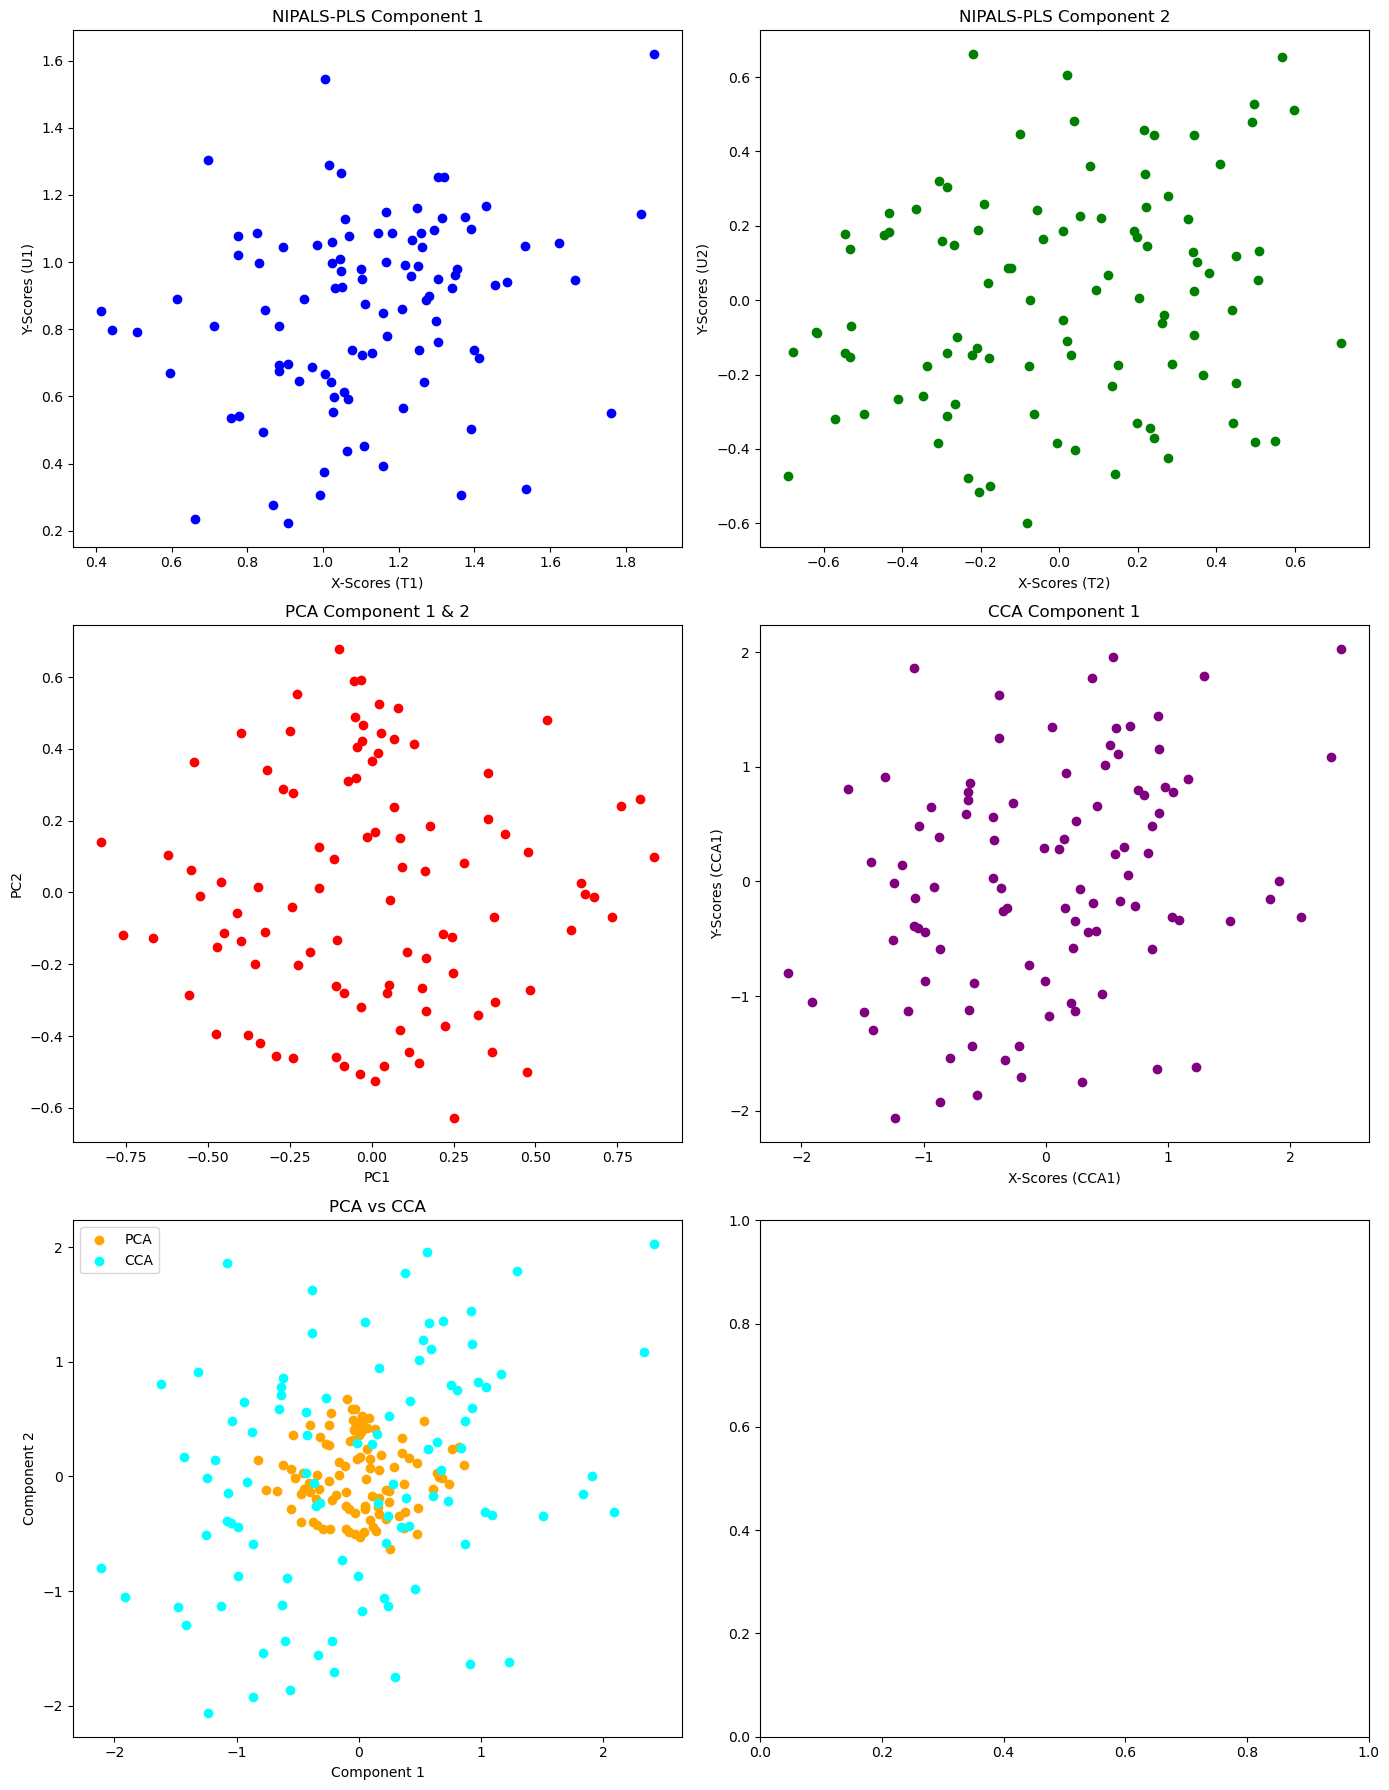

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

# NIPALS Algorithm Implementation
def nipals_pls(X, Y, num_components=2, tol=1e-6, max_iter=500):
    N, K = X.shape
    M = Y.shape[1]
    
    T = np.zeros((N, num_components))  
    U = np.zeros((N, num_components))  
    W = np.zeros((K, num_components))  
    C = np.zeros((M, num_components))  
    P = np.zeros((K, num_components))  
    Q = np.zeros((M, num_components))  
    B = np.zeros((K, M))               
    
    X_res = X.copy()
    Y_res = Y.copy()

    for comp in range(num_components):
        u = Y_res[:, 0].copy()  
        t = np.zeros(N)
        for iteration in range(max_iter):
            w = X_res.T @ u / (u.T @ u)
            w /= np.linalg.norm(w)  

            t_new = X_res @ w

            c = Y_res.T @ t_new / (t_new.T @ t_new)
            c /= np.linalg.norm(c)  

            u_new = Y_res @ c / (c.T @ c)

            if np.linalg.norm(t_new - t) / np.linalg.norm(t_new) < tol:
                t = t_new
                u = u_new
                break

            t = t_new
            u = u_new

        p = X_res.T @ t / (t.T @ t)
        q = Y_res.T @ u / (u.T @ u)

        T[:, comp] = t
        U[:, comp] = u
        W[:, comp] = w
        C[:, comp] = c
        P[:, comp] = p
        Q[:, comp] = q

        X_res -= t[:, np.newaxis] @ p[np.newaxis, :]
        Y_res -= u[:, np.newaxis] @ q[np.newaxis, :]

    B_pls = W @ np.linalg.inv(P.T @ W) @ Q.T
    return T, U, W, P, Q, B_pls

# PCA Implementation
def apply_pca(X, num_components=2):
    pca = PCA(n_components=num_components)
    scores = pca.fit_transform(X)
    return scores

# CCA Implementation
def apply_cca(X, Y, num_components=2):
    cca = CCA(n_components=num_components)
    cca.fit(X, Y)
    X_scores, Y_scores = cca.transform(X, Y)
    return X_scores, Y_scores

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)
Y = np.random.rand(100, 3)

# Apply NIPALS-PLS
T, U, W, P, Q, B_pls = nipals_pls(X, Y, num_components=2)

# Apply PCA
pca_scores = apply_pca(X, num_components=2)

# Apply CCA
X_scores_cca, Y_scores_cca = apply_cca(X, Y, num_components=2)

# Plot results
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# NIPALS-PLS
axs[0, 0].scatter(T[:, 0], U[:, 0], color='blue')
axs[0, 0].set_title('NIPALS-PLS Component 1')
axs[0, 0].set_xlabel('X-Scores (T1)')
axs[0, 0].set_ylabel('Y-Scores (U1)')

# NIPALS-PLS Component 2
axs[0, 1].scatter(T[:, 1], U[:, 1], color='green')
axs[0, 1].set_title('NIPALS-PLS Component 2')
axs[0, 1].set_xlabel('X-Scores (T2)')
axs[0, 1].set_ylabel('Y-Scores (U2)')

# PCA Component 1
axs[1, 0].scatter(pca_scores[:, 0], pca_scores[:, 1], color='red')
axs[1, 0].set_title('PCA Component 1 & 2')
axs[1, 0].set_xlabel('PC1')
axs[1, 0].set_ylabel('PC2')

# CCA Component 1
axs[1, 1].scatter(X_scores_cca[:, 0], Y_scores_cca[:, 0], color='purple')
axs[1, 1].set_title('CCA Component 1')
axs[1, 1].set_xlabel('X-Scores (CCA1)')
axs[1, 1].set_ylabel('Y-Scores (CCA1)')

# PCA and CCA Comparison
axs[2, 0].scatter(pca_scores[:, 0], pca_scores[:, 1], label='PCA', color='orange')
axs[2, 0].scatter(X_scores_cca[:, 0], Y_scores_cca[:, 0], label='CCA', color='cyan')
axs[2, 0].set_title('PCA vs CCA')
axs[2, 0].set_xlabel('Component 1')
axs[2, 0].set_ylabel('Component 2')
axs[2, 0].legend()

plt.tight_layout()
plt.show()


## Penalized Regression

For linear regression problems, where $ y = X\beta \in \mathbb{R}^n $ with $ X \in \mathbb{R}^{n \times p} $ and $ \beta \in \mathbb{R}^p $, ordinary least squares (OLS) regression minimizes the squared regression error:

$$
\| y - X\beta \|_2^2 = (y - X\beta)^T (y - X\beta),
$$

yielding an unbiased estimator:

$$
\hat{\beta}_{\text{OLS}} = (X^T X)^{-1} X^T y.
$$

Although the OLS estimator is simple and unbiased, if the design matrix $ X $ is not of full rank, then $ \hat{\beta} $ is not unique, and its variance:

$$
\text{var}(\hat{\beta}) = (X^T X)^{-1} \sigma^2,
$$

where $ \sigma^2 $ is the variance of i.i.d. regression errors, may be very large.

To achieve better prediction, Hoerl and Kennard introduced ridge regression, which can be formulated as:

$$
\hat{\beta} = \arg \min_{\beta} \left\{ \| y - X\beta \|_2^2 + \lambda \sum_{j=1}^p |\beta_j|^\gamma \right\},
$$

where $ \gamma \geq 1 $ and $ \lambda \geq 0 $ are positive scalars, and $ \lambda = 0 $ corresponds to ordinary least squares regression.

When $ \gamma $ takes different values, the penalized regression has different forms. The most well-known penalized regressions are:

1. **Ridge Regression** $(\gamma = 2)$:
   
   $$
   \hat{\beta}_{\text{ridge}} = \arg \min_{\beta} \left\{ \| y - X\beta \|_2^2 + \lambda \| \beta \|_2^2 \right\},
   $$
   
   where $ \| \beta \|_2^2 = \sum_{i=1}^p \beta_i^2 $. The solution of ridge regression is:

   $$
   \hat{\beta}_{\text{ridge}} = (X^T X + \lambda I)^{-1} X^T y.
   $$

2. **Lasso Regression** $(\gamma = 1)$, also known as Least Absolute Shrinkage and Selection Operator (Lasso):

   $$
   \hat{\beta}_{\text{Lasso}} = \arg \min_{\beta} \left\{ \| y - X\beta \|_2^2 + \lambda \| \beta \|_1 \right\},
   $$
   
   where $ \| \beta \|_1 = \sum_{i=1}^p |\beta_i| $ is the $ L_1 $-norm.
   
   ## Lasso and Penalized Regression Methods

The Lasso solution, in its soft-thresholded version, is given by:

$$
\hat{\beta}_i^{\text{Lasso}}(\gamma) = S(\hat{\beta}_i, \gamma) = \begin{cases}
\hat{\beta}_i - \gamma, & \text{if } \hat{\beta}_i > 0 \text{ and } \gamma < |\hat{\beta}_i|, \\
\hat{\beta}_i + \gamma, & \text{if } \hat{\beta}_i < 0 \text{ and } \gamma < |\hat{\beta}_i|, \\
0, & \text{if } \gamma \geq |\hat{\beta}_i|,
\end{cases}
$$

where$ S(x, \gamma)$  is the soft-thresholding function:

$$
S(x, \gamma) = \begin{cases}
x - \gamma, & \text{if } x > \gamma, \\
x + \gamma, & \text{if } x < -\gamma, \\
0, & \text{if } |x| \leq \gamma.
\end{cases}
$$

### Key Differences Between Ridge Regression and Lasso Regression

- **Variable Selection:** The $ L_1 $ penalty in Lasso results in variable selection, as variables with coefficients of zero are effectively omitted from the model. In contrast, the $ L_2 $ penalty in ridge regression does not perform variable selection.
- **Shrinkage Effect:** An $ L_2 $ penalty $ \lambda \sum_{j=1}^p \beta_j^2 $ pushes $ \beta_j $ toward zero with a force proportional to the value of the coefficient. In contrast, an $ L_1 $ penalty $ \lambda \sum_{j=1}^p |\beta_j| $ exerts the same force on all nonzero coefficients. Thus, for variables that are most valuable in the model, the $ L_1 $ penalty shrinks less.

### Coordinate-wise Descent and Other Methods

1. **Nonnegative Garotte:** This method solves

   $$
   \min_{c} \left\{ \frac{1}{2} \sum_{i=1}^n \left(y_i - \sum_{j=1}^p x_{ij} c_j \hat{\beta}_j \right)^2 + \gamma \sum_{j=1}^p c_j \right\},
   $$

   subject to \( c_j \geq 0 \). The coordinate-wise update is:

   $$
   c_j \leftarrow \frac{\beta_j - \lambda}{\beta_j + \lambda} \text{ for } \beta_j \ne 0.
   $$

2. **Elastic Net:** This method adds another constraint $ \lambda_2 \sum_{j=1}^p \frac{\beta_j^2}{2} $ to Lasso:

   $$
   \min_{\beta} \left\{ \frac{1}{2} \sum_{i=1}^n \left(y_i - \sum_{j=1}^p x_{ij} \beta_j \right)^2 + \lambda_1 \sum_{j=1}^p |\beta_j| + \lambda_2 \sum_{j=1}^p \frac{\beta_j^2}{2} \right\}.
   $$

   The coordinate-wise update is:

   $$
   \beta_j \leftarrow \frac{1}{\lambda_2} \text{S}\left(\frac{1}{n} \sum_{i=1}^n x_{ij} (y_i - \tilde{y}_i), \lambda_1 \right).
   $$

3. **Grouped Lasso:** This method solves:

   $$
   \min_{\beta} \left\{ \frac{1}{2} \sum_{i=1}^n \left(y_i - \sum_{j=1}^m X_j \beta_j \right)^2 + \sum_{j=1}^m \lambda_j \|\beta_j\|_2 \right\},
   $$

   where $ \lambda_j $ is scaled by $ \sqrt{p_j} $. The coordinate-wise update is:

   $$
   \beta_j \leftarrow \left(\frac{\|\tilde{s}_j\|_2^2 - \lambda_j}{\|\tilde{s}_j\|_2^2} \right)_+.
   $$

4. **Berhu Penalty:** This method is a hybrid of Lasso and ridge regression, solving:

   $$
   \min_{\beta} \left\{ \frac{1}{2} \sum_{i=1}^n \left(y_i - \sum_{j=1}^p x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^p \left(\frac{|\beta_j|}{\delta} \right)_+ \right\}.
   $$

   The coordinate-wise update is:

   $$
   \beta_j \leftarrow \begin{cases}
   \frac{1}{n} \sum_{i=1}^n x_{ij} (y_i - \tilde{y}_i) / (1 + \lambda / \delta), & \text{if } |\beta_j| \geq \delta, \\
   \text{S}\left(\frac{1}{n} \sum_{i=1}^n x_{ij} (y_i - \tilde{y}_i), \lambda \right), & \text{if } |\beta_j| < \delta.
   \end{cases}
   $$



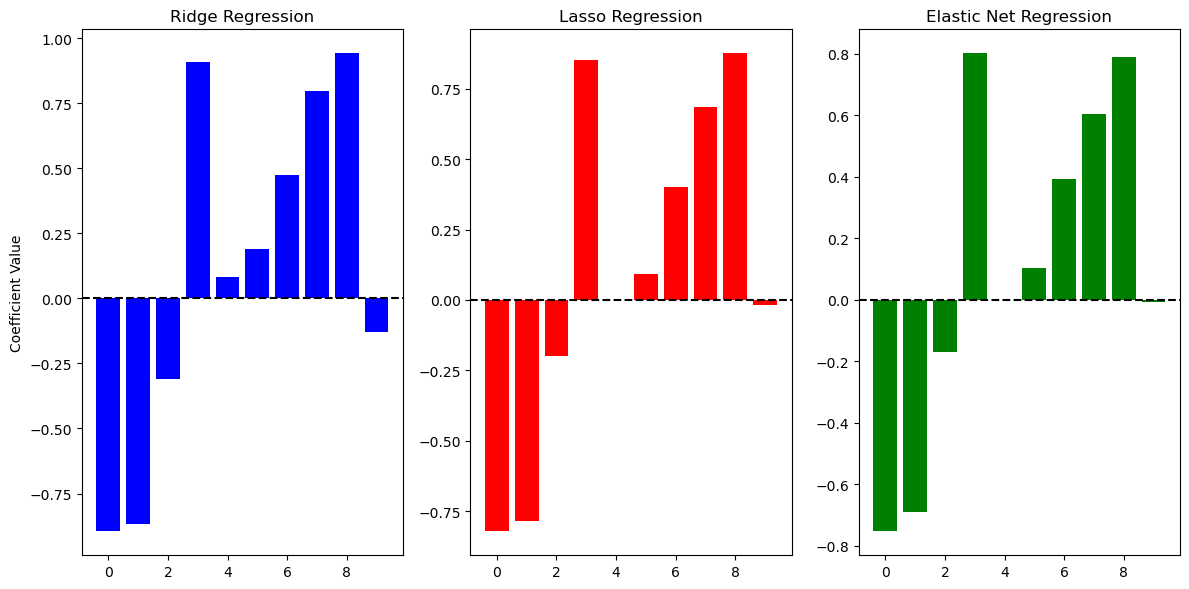

In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Data Generation
def generate_data(n_samples, n_features):
    X = [[random.uniform(-1, 1) for _ in range(n_features)] for _ in range(n_samples)]
    true_beta = [random.uniform(-1, 1) for _ in range(n_features)]
    y = [sum(X[i][j] * true_beta[j] for j in range(n_features)) + random.gauss(0, 0.1) for i in range(n_samples)]
    return X, y, true_beta

# Ridge Regression
def ridge_regression(X, y, lambda_reg):
    X = np.array(X)
    y = np.array(y)
    X_transpose = X.T
    I = np.eye(X.shape[1])
    beta_ridge = np.linalg.inv(X_transpose @ X + lambda_reg * I) @ X_transpose @ y
    return beta_ridge

# Soft Thresholding for Lasso
def soft_thresholding(beta_i, gamma):
    return max(0, beta_i - gamma) - max(0, -beta_i - gamma)

# Lasso Regression
def lasso_regression(X, y, lambda_reg, num_iters=1000, tol=1e-6):
    X = np.array(X)
    y = np.array(y)
    m, n = X.shape
    beta_lasso = np.zeros(n)
    
    for _ in range(num_iters):
        beta_old = beta_lasso.copy()
        for j in range(n):
            residual = y - X @ beta_lasso + X[:, j] * beta_lasso[j]
            beta_lasso[j] = soft_thresholding(X[:, j] @ residual / np.sum(X[:, j]**2), lambda_reg)
        
        if np.linalg.norm(beta_lasso - beta_old) < tol:
            break
    
    return beta_lasso

# Elastic Net Regression
def elastic_net_regression(X, y, lambda1, lambda2, num_iters=1000, tol=1e-6):
    X = np.array(X)
    y = np.array(y)
    m, n = X.shape
    beta_elastic = np.zeros(n)
    
    for _ in range(num_iters):
        beta_old = beta_elastic.copy()
        for j in range(n):
            residual = y - X @ beta_elastic + X[:, j] * beta_elastic[j]
            rho = X[:, j] @ residual / np.sum(X[:, j]**2)
            beta_elastic[j] = soft_thresholding(rho, lambda1) / (1 + lambda2)
        
        if np.linalg.norm(beta_elastic - beta_old) < tol:
            break
    
    return beta_elastic

# Plotting Results
def plot_results(beta_ridge, beta_lasso, beta_elastic, true_beta):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Ridge Regression")
    plt.bar(range(len(beta_ridge)), beta_ridge, color='b')
    plt.axhline(0, color='k', linestyle='--')
    plt.ylabel('Coefficient Value')
    
    plt.subplot(1, 3, 2)
    plt.title("Lasso Regression")
    plt.bar(range(len(beta_lasso)), beta_lasso, color='r')
    plt.axhline(0, color='k', linestyle='--')
    
    plt.subplot(1, 3, 3)
    plt.title("Elastic Net Regression")
    plt.bar(range(len(beta_elastic)), beta_elastic, color='g')
    plt.axhline(0, color='k', linestyle='--')
    
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Generate synthetic data
    X, y, true_beta = generate_data(100, 10)
    
    # Parameters
    lambda_reg_ridge = 1.0
    lambda_reg_lasso = 0.1
    lambda1_elastic = 0.1
    lambda2_elastic = 0.1
    
    # Compute coefficients
    beta_ridge = ridge_regression(X, y, lambda_reg_ridge)
    beta_lasso = lasso_regression(X, y, lambda_reg_lasso)
    beta_elastic = elastic_net_regression(X, y, lambda1_elastic, lambda2_elastic)
    
    # Plot results
    plot_results(beta_ridge, beta_lasso, beta_elastic, true_beta)


# Gradient Projection for Sparse Reconstruction

## Problem Formulation

The general formulation of the Lasso problem is an unconstrained convex optimization problem given by:

$$
\min_x \frac{1}{2} \|y - Ax\|_2^2 + \tau \|x\|_1
$$

where $ x \in \mathbb{R}^n $, $ y \in \mathbb{R}^k $, $ A \in \mathbb{R}^{k \times n} $, and $ \tau $ is a nonnegative parameter. When the variable $ x $ is a sparse vector, the above optimization is referred to as the sparse reconstruction of $ x $.

## Related Optimization Problems

This problem is closely related to the following constrained convex optimization problems:

### Quadratically Constrained Linear Program (QCLP)

$$
\min_x \|x\|_1 \quad \text{subject to} \quad \|y - Ax\|_2^2 \leq \epsilon
$$

### Quadratic Program (QP)

$$
\min_x \|y - Ax\|_2^2 \quad \text{subject to} \quad \|x\|_1 \leq \alpha
$$

where $ \epsilon $ and $ \alpha $ are nonnegative real parameters.

## Gradient Projection Algorithm

The Gradient Projection (GP) algorithm is used to solve the quadratic programming formulation of the problem. Figueiredo et al. [92] proposed the GPSR (Gradient Projection for Sparse Reconstruction) approach, which splits the variable \( x \) into its positive and negative parts:

$$
x = u - v, \quad u \geq 0, \quad v \geq 0
$$

where $ u_i = (x_i)^+ $ and $ v_i = (-x_i)^+ $ for all $ i = 1, \ldots, n $, with $ (x)^+ = \max\{0, x\} $.

The problem can be rewritten as the following bound-constrained quadratic program (BCQP):

$$
\min_{u, v} \frac{1}{2} \|y - A(u - v)\|_2^2 + \tau \mathbf{1}_n^T u + \tau \mathbf{1}_n^T v
$$

subject to $ u \geq 0 $ and $ v \geq 0 $.

### Standard BCQP Form

The BCQP can be written in the standard form:

$$
\min_z \left\{ c^T z + \frac{1}{2} z^T B z \right\}
$$

subject to $ z \geq 0 $,

where

$$
z = \begin{bmatrix}
u \\
v
\end{bmatrix}, \quad
c = \begin{bmatrix}
\tau \mathbf{1}_n \\
-\tau \mathbf{1}_n
\end{bmatrix}, \quad
b = A^T y
$$

and

$$
B = \begin{bmatrix}
A^T A & -A^T A \\
-A^T A & A^T A
\end{bmatrix}
$$

### Nonnegative Case

If the solution $ x $ is known to be nonnegative, then:

$$
\frac{1}{2} \|y - Ax\|_2^2 = \frac{1}{2} y^T y - y^T A x + \frac{1}{2} x^T A^T A x
$$

Since $ x^T A^T y = (x^T A^T y)^T = y^T A x $, the problem can be equivalently written as:

$$
\min_x \left\{ \tau \mathbf{1}_n^T - A^T y x + \frac{1}{2} x^T A^T A x \right\}
$$

subject to $ x \geq 0 $.

## Gradient Projection Method

Gradient projection is an efficient method for solving general minimization problems over a convex set $ C $ in unconstrained minimization form:

$$
\min_x \{ f(x) + h(x) \}
$$

where $ f(x) $ is continuously differentiable on $ C $ and $ h(x) $ is non-smooth on $ C $.

According to the first-order optimality condition, the solution $ x^* $ satisfies:

$$
x^* \in \arg \min_{x \in C} \{ f(x) + h(x) \} \iff 0 \in \nabla f(x^*) + \partial h(x^*)
$$
# Gradient Projection for Sparse Reconstruction (GPSR)

## Optimization Problem

The general formulation of the Lasso problem is:

$$
\min_x \frac{1}{2} \|y - Ax\|_2^2 + \tau \|x\|_1
$$

where $ x \in \mathbb{R}^n $, $ y \in \mathbb{R}^k $, $ A \in \mathbb{R}^{k \times n} $, and $ \tau $ is a nonnegative parameter.

## Gradient Projection Method

The Gradient Projection (GP) method is used for solving general minimization problems over a convex set $ C $ in the unconstrained minimization form:

$$
\min_x \{ f(x) + h(x) \}
$$

where $ f(x) $ is continuously differentiable on $ C $ and $ h(x) $ is non-smooth on $ C $. The first-order optimality condition is:

$$
x^* \in \arg \min_{x \in C} \{ f(x) + h(x) \} \iff 0 \in \nabla f(x^*) + \partial h(x^*)
$$

For \( f(x) = \frac{1}{2} \|x - z\|_2^2 \), we have:

$$
\nabla f(x) = x - z
$$

Thus, the first-order condition becomes:

$$
0 \in (x - z) + \partial h(x) \iff z \in x + \partial h(x)
$$

If $ \partial h(x) = -\nabla f(x)$, then:

$$
z = x - \nabla f(x)
$$

This represents the gradient projection of $ x $ onto the convex set $ C $. The basic gradient projection updating formula is:

$$
x^{k+1} = x^k - \mu^k \nabla f(x^k)
$$

where $ \mu^k $ is the step length at the $ k $-th update.

## Basic Gradient Projection Approach

The basic gradient projection approach for solving the problem consists of the following steps [92]:

1. **Choose Scalar Parameter:**
   Choose some scalar parameter \( \alpha_k > 0 \) and set:

   $$
   w^k = (z^k - \alpha_k \nabla F(z^k))^+
   $$

2. **Choose Step Size and Update:**
   Choose the scalar \( \lambda_k \in [0, 1] \) and set:

   $$
   z^{k+1} = z^k + \lambda_k (w^k - z^k)
   $$

In this approach, each iterate $ z^k $ is searched along the negative gradient $ -\nabla F(z^k) $, projected onto the nonnegative orthant, and performing a backtracking line search until a sufficient decrease is attained in $ F $.

## GPSR-BB Algorithm

The GPSR-BB algorithm, based on the Barzilai–Borwein (BB) method, uses $ H_k = \eta(k) I $ as an approximation of the Hessian matrix. The steps for the GPSR-BB algorithm are:

1. **Input:**
   - Data vector $ y \in \mathbb{R}^m $
   - Input matrix $ A \in \mathbb{R}^{m \times n} $

2. **Initialization:**
   - Randomly generate a nonnegative vector $ z^{(0)} \in \mathbb{R}^{2n}_+ $.

3. **Choose Parameters:**
   - Nonnegative parameters $ \tau, \beta \in (0, 1) $
   - $ \mu \in (0, 1/2) $
   - $ \alpha_{\text{min}}, \alpha_{\text{max}}, \alpha_0 \in [\alpha_{\text{min}}, \alpha_{\text{max}}] $

4. **Compute:**
   - $ b = A^T y $
   - $ c = \tau \mathbf{1}_n - b $
   - $ B = A^T A - A^T A $

5. **Set Iteration:**
   - $ k = 0 $

6. **Repeat:**

   1. **Calculate Gradient:**
      $$
      \nabla F(z^k) = c + Bz^k
      $$

   2. **Compute Step:**
      $$
      \delta = z^k - \alpha \nabla F(z^k) - z^k
      $$

   3. **Line Search:**
      Find $ \lambda^k $ that minimizes $ F(z^k + \lambda^k \delta) $ on $ \lambda^k \in [0, 1] $.

   4. **Update:**
      $$
      z^{k+1} = z^k + \lambda^k \delta
      $$

   5. **Update \( \alpha \):**
      Compute:
      $$
      \gamma^k = \delta^k B \delta^k
      $$

      If $ \gamma^k = 0 $, let $ \alpha^k = \alpha_{\text{max}} $, otherwise:

      $$
      \alpha^k = \text{mid}(\alpha_{\text{min}}, \gamma^k / 2, \alpha_{\text{max}})
      $$

   6. **Check Convergence:**
      If:

      $$
      \|z^k - z^k - \bar{\alpha} \nabla F(z)\| \leq \text{tol}_P
      $$

      where $ \text{tol}_P $ is a small parameter and $ \bar{\alpha} $ is a positive constant, then terminate; otherwise, set $ k \leftarrow k + 1 $ and return to Step 6.

7. **Output:**
   - $ z^{k+1} $


## Steps

### Soft Thresholding Function:

Implements the L1-norm soft thresholding used in Lasso regularization.
Basic Gradient Projection (GPSR-Basic):

Performs gradient descent with soft thresholding to enforce sparsity.
### Barzilai-Borwein Gradient Projection (GPSR-BB):

Uses the Barzilai-Borwein method for more efficient step size selection.
### Synthetic Data Generation:

Generates random data for testing purposes.
### Plotting Results:

Visualizes the true coefficients versus the results obtained using GPSR and GPSR-BB.

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars


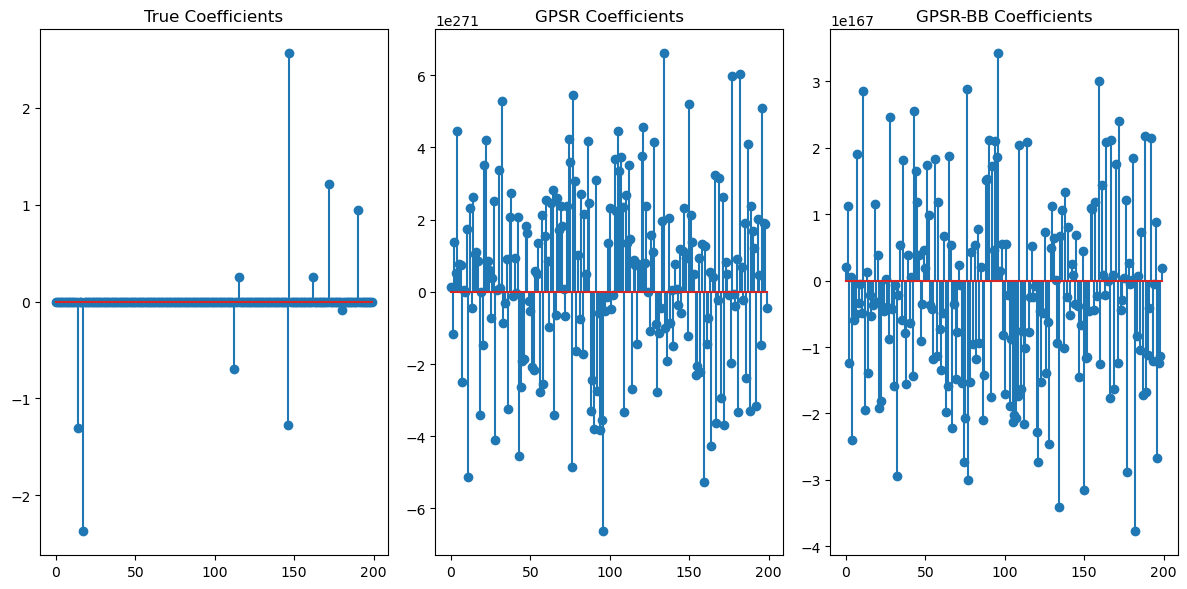

In [9]:
import numpy as np

def soft_thresholding(x, tau):
    """Soft thresholding function."""
    return np.sign(x) * np.maximum(np.abs(x) - tau, 0)

def gradient_projection_basic(A, y, tau, max_iter=100, tol=1e-6):
    """
    Basic Gradient Projection for Sparse Reconstruction (GPSR).
    
    Parameters:
    - A: Input matrix
    - y: Data vector
    - tau: Regularization parameter
    - max_iter: Maximum number of iterations
    - tol: Tolerance for convergence
    
    Returns:
    - x: Solution vector
    """
    m, n = A.shape
    x = np.zeros(n)  # Initial guess
    for _ in range(max_iter):
        # Gradient of the objective function
        grad = -A.T @ (y - A @ x)
        # Update rule
        x_new = soft_thresholding(x - grad, tau)
        # Convergence check
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x

def gradient_projection_bb(A, y, tau, alpha_min=1e-4, alpha_max=1, max_iter=100, tol=1e-6):
    """
    Barzilai-Borwein Gradient Projection for Sparse Reconstruction (GPSR-BB).
    
    Parameters:
    - A: Input matrix
    - y: Data vector
    - tau: Regularization parameter
    - alpha_min: Minimum step size
    - alpha_max: Maximum step size
    - max_iter: Maximum number of iterations
    - tol: Tolerance for convergence
    
    Returns:
    - x: Solution vector
    """
    m, n = A.shape
    x = np.random.rand(n)  # Random initialization
    z = np.zeros(n)
    alpha = alpha_max
    for _ in range(max_iter):
        # Gradient of the objective function
        grad = -A.T @ (y - A @ x) + tau * np.sign(x)
        # Step direction
        delta = x - alpha * grad
        # Line search
        lambda_k = 1  # Simplified line search
        z_new = x + lambda_k * delta
        # Update
        x_new = soft_thresholding(z_new, tau)
        # Convergence check
        if np.linalg.norm(x_new - x) < tol:
            break
        # Update alpha
        gamma = delta @ delta
        alpha = min(max(alpha_min, gamma / (delta @ (x_new - x))), alpha_max)
        x = x_new
    return x

def generate_synthetic_data(m, n, sparsity=0.1):
    """Generate synthetic data for testing."""
    np.random.seed(0)
    A = np.random.randn(m, n)
    x_true = np.zeros(n)
    non_zero_indices = np.random.choice(n, int(n * sparsity), replace=False)
    x_true[non_zero_indices] = np.random.randn(len(non_zero_indices))
    y = A @ x_true + np.random.randn(m) * 0.1  # Add noise
    return A, y, x_true

def plot_results(A, y, x_true, x_gpsr, x_gpsr_bb):
    """Plot the results for comparison."""
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.stem(x_true, use_line_collection=True)
    plt.title('True Coefficients')
    
    plt.subplot(1, 3, 2)
    plt.stem(x_gpsr, use_line_collection=True)
    plt.title('GPSR Coefficients')
    
    plt.subplot(1, 3, 3)
    plt.stem(x_gpsr_bb, use_line_collection=True)
    plt.title('GPSR-BB Coefficients')

    plt.tight_layout()
    plt.show()

# Parameters
m, n = 100, 200
tau = 0.1
sparsity = 0.05

# Generate synthetic data
A, y, x_true = generate_synthetic_data(m, n, sparsity)

# Apply GPSR and GPSR-BB algorithms
x_gpsr = gradient_projection_basic(A, y, tau)
x_gpsr_bb = gradient_projection_bb(A, y, tau)

# Plot the results
plot_results(A, y, x_true, x_gpsr, x_gpsr_bb)
